In [67]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
import matplotlib.pyplot as plt


In [68]:
X = pd.read_csv("pima-indians-diabetes-features.csv")
y = pd.read_csv("pima-indians-diabetes-target.csv")

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

In [71]:
model = LogisticRegression(max_iter=1000)

In [72]:
grid_search = GridSearchCV(model, param_grid, cv=5)

In [73]:
grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [74]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'C': 0.01}
Best score:  0.7687591630014661


In [75]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [76]:
confusion = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[78 21]
 [20 35]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



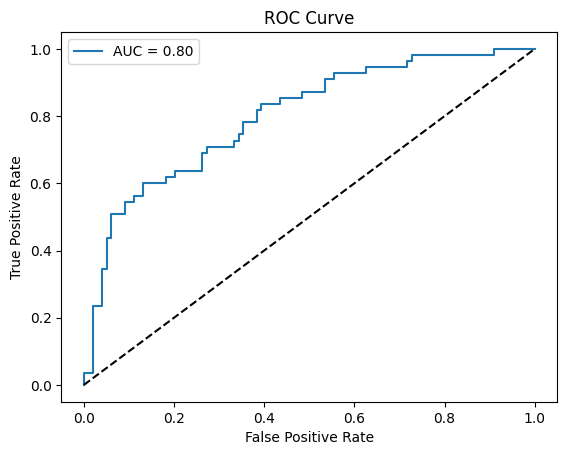

In [77]:
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Cross-Validation Accuracy: 0.77


<function matplotlib.pyplot.show(close=None, block=None)>

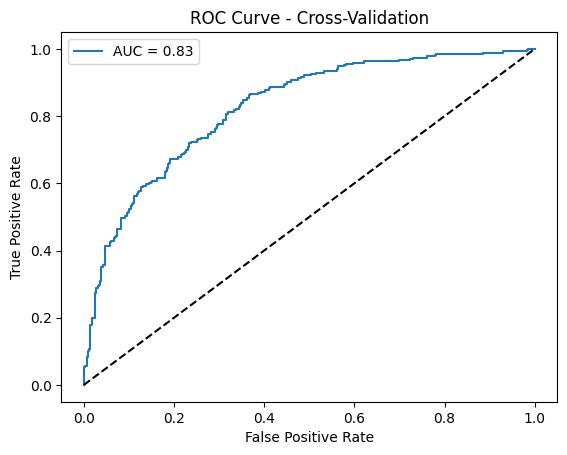

In [78]:
y_pred_cv = cross_val_predict(best_model, X, y.values.ravel(), cv=5, method='predict_proba')[:, 1]
fpr_cv, tpr_cv, thresholds_cv = roc_curve(y.values.ravel(), y_pred_cv)
roc_auc_cv = roc_auc_score(y.values.ravel(), y_pred_cv)
print(f"Cross-Validation Accuracy: {grid_search.best_score_:.2f}")
plt.plot(fpr_cv, tpr_cv, label=f"AUC = {roc_auc_cv:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Cross-Validation")
plt.legend()
plt.show

In [79]:
cv_scores = cross_val_score(model, X, y.values.ravel(), cv=5)

print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", np.mean(cv_scores))
print("Standard deviation of cross-validation scores: ", np.std(cv_scores))

Cross-validation scores:  [0.77272727 0.74675325 0.75324675 0.81045752 0.77777778]
Mean cross-validation score:  0.7721925133689839
Standard deviation of cross-validation scores:  0.022368682173990264
